# NumPy quickstart

## Learner profile

This is a quick overview of arrays in NumPy. It demonstrates how n-dimensional (
) arrays are represented and can be manipulated. In particular, if you don’t know how to apply common functions to n-dimensional arrays (without using for-loops), or if you want to understand axis and shape properties for n-dimensional arrays, this article might be of help.

## Learning Objectives

After reading, you should be able to:

* Understand the difference between one-, two- and n-dimensional arrays in NumPy;

* Understand how to apply some linear algebra operations to n-dimensional arrays without using for-loops;

* Understand axis and shape properties for n-dimensional arrays.

## The Basics
NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

For example, the array for the coordinates of a point in 3D space, [1, 2, 1], has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

[[1., 0., 0.],
 [0., 1., 2.]]

NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

### ndarray.ndim
    the number of axes (dimensions) of the array.

### ndarray.shape
    the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. 
    For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes,
    ndim.

### ndarray.size
    the total number of elements of the array. This is equal to the product of the elements of shape.

### ndarray.dtype
    an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types.
    Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

### ndarray.itemsize
    the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8),
    while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

### ndarray.data
    the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access
    the elements in an array using indexing facilities.

## An Example

In [16]:
import numpy as np
a = np.arange(15).reshape(3,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [17]:
a.shape

(3, 5)

In [18]:
a.ndim

2

In [19]:
a.dtype.name

'int32'

In [20]:
a.itemsize

4

In [21]:
a.size

15

In [22]:
type(a)

numpy.ndarray

In [23]:
b = np.array([6,7,8])
b

array([6, 7, 8])

In [24]:
type(b)

numpy.ndarray

## Array Creation
There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [25]:
import numpy as np
a = np.array([2,3,4])
a

array([2, 3, 4])

In [26]:
a.dtype

dtype('int32')

In [27]:
b = np.array([1.2, 3.5, 5.1])
b

array([1.2, 3.5, 5.1])

In [28]:
b.dtype

dtype('float64')

A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.

In [29]:
a = np.array(1,2,3,4)  # Wrong

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [31]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [32]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The type of the array can also be explicitly specified at creation time:

In [33]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64, but it can be specified via the key word argument dtype.

In [34]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [35]:
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [36]:
np.empty((2,3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

To create sequences of numbers, NumPy provides the arange function which is analogous to the Python built-in range, but returns an array.

In [37]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [38]:
np.arange(0,2,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When arange is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function linspace that receives as an argument the number of elements that we want, instead of the step:

In [39]:
from numpy import pi
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [59]:
x = np.linspace(0, 2 * pi, 100)
f = np.sin(x)

## Printing Arrays
When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

* the last axis is printed from left to right,
* the second-to-last is printed from top to bottom,
* the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [41]:
a = np.arange(6)   # 1D array
print(a)

[0 1 2 3 4 5]


In [42]:
b = np.arange(12).reshape(4,3)   # 2D array
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [43]:
c = np.arange(24).reshape(2,3,4)   # 3D array
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


See below to get more details on reshape.

If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [44]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [45]:
print(np.arange(10000).reshape(100, 100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


To disable this behaviour and force NumPy to print the entire array, you can change the printing options using set_printoptions.

In [46]:
import sys
np.set_printoptions(threshold=sys.maxsize)  # sys module should be imported

## Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [47]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [48]:
c = a - b
c

array([20, 29, 38, 47])

In [49]:
b**2

array([0, 1, 4, 9])

In [50]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [51]:
a < 35

array([ True,  True, False, False])

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:

In [52]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [53]:
A @ B     # matrix product

array([[5, 4],
       [3, 4]])

In [54]:
A.dot(B)  # another matrix product

array([[5, 4],
       [3, 4]])

Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [55]:
rg = np.random.default_rng(1)  # create instance of default random number generator
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [56]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [57]:
a += b  # b is not automatically converted to integer type

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [ ]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

In [ ]:
c = a + b
c

In [ ]:
c.dtype.name

In [ ]:
d = np.exp(c * 1j)
d

In [ ]:
d.dtype.name

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [ ]:
a = rg.random((2, 3))
a

In [ ]:
a.sum()

In [ ]:
a.min()

In [ ]:
a.max()

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [ ]:
b = np.arange(12).reshape(3, 4)
b

In [ ]:
b.sum(axis=0)     # sum of each column

In [ ]:
b.min(axis=1)     # min of each row

In [ ]:
b.cumsum(axis=1)  # cumulative sum along each row

## Universal Functions
NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions” (ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [ ]:
B = np.arange(3)
B

In [ ]:
np.exp(B)

In [ ]:
np.sqrt(B)

In [ ]:
C = np.array([2., -1., 4.])
np.add(B, C)

## Indexing, Slicing and Iterating
One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [ ]:
a = np.arange(10)**3
a

In [ ]:
a[2]

In [ ]:
a[2:5]

In [ ]:
# equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
a

In [ ]:
a[::-1]  # reversed a

In [ ]:
for i in a:
    print(i**(1 / 3.))

Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [ ]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
b

In [ ]:
b[2, 3]

In [ ]:
b[0:5, 1]  # each row in the second column of b

In [ ]:
b[:, 1]    # equivalent to the previous example

In [ ]:
b[1:3, :]  # each column in the second and third row of b

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [ ]:
b[-1]   # the last row. Equivalent to b[-1, :]

The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as b[i, ...].

The dots (...) represent as many colons as needed to produce a complete indexing tuple. For example, if x is an array with 5 axes, then

* x[1, 2, ...] is equivalent to x[1, 2, :, :, :],
* x[..., 3] to x[:, :, :, :, 3] and
* x[4, ..., 5, :] to x[4, :, :, 5, :].

In [ ]:
c = np.array([[[  0,  1,  2],  # a 3D array (two stacked 2D arrays)
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])
c.shape

In [ ]:
c[1, ...]  # same as c[1, :, :] or c[1]

In [ ]:
c[..., 2]  # same as c[:, :, 2]

Iterating over multidimensional arrays is done with respect to the first axis:

In [60]:
for row in b:
    print(row)

[3.51182162 3.9504637  3.14415961]
[3.94864945 3.31183145 3.42332645]


However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [61]:
for element in b.flat:
    print(element)

3.5118216247002567
3.950463696325935
3.144159612719634
3.9486494471372438
3.3118314520104857
3.423326448972576


# Shape Manipulation

## Changing the shape of an array
An array has a shape given by the number of elements along each axis:

In [ ]:
a = np.floor(10 * rg.random((3, 4)))
a

In [ ]:
a.shape

The shape of an array can be changed with various commands. Note that the following three commands all return a modified array, but do not change the original array:

In [ ]:
a.ravel()  # returns the array, flattened

In [ ]:
a.reshape(6, 2)  # returns the array with a modified shape

In [ ]:
a.T  # returns the array, transposed

In [ ]:
a.T.shape

In [ ]:
a.shape

The order of the elements in the array resulting from ravel is normally “C-style”, that is, the rightmost index “changes the fastest”, so the element after a[0, 0] is a[0, 1]. If the array is reshaped to some other shape, again the array is treated as “C-style”. NumPy normally creates arrays stored in this order, so ravel will usually not need to copy its argument, but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions ravel and reshape can also be instructed, using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself:

In [ ]:
a

In [ ]:
a.resize((2, 6))
a

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [ ]:
a.reshape(3, -1)

## Stacking together different arrays
Several arrays can be stacked together along different axes:

In [ ]:
a = np.floor(10 * rg.random((2, 2)))
a

In [ ]:
b = np.floor(10 * rg.random((2, 2)))
b

In [ ]:
np.vstack((a, b))

In [ ]:
np.hstack((a, b))

The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to hstack only for 2D arrays:

In [ ]:
from numpy import newaxis
np.column_stack((a, b))  # with 2D arrays

In [ ]:
a = np.array([4., 2.])
b = np.array([3., 8.])
np.column_stack((a, b))  # returns a 2D array

In [ ]:
np.hstack((a, b))        # the result is different

In [ ]:
a[:, newaxis]  # view `a` as a 2D column vector

In [ ]:
np.column_stack((a[:, newaxis], b[:, newaxis]))

In [ ]:
np.hstack((a[:, newaxis], b[:, newaxis]))  # the result is the same

On the other hand, the function row_stack is equivalent to vstack for any input arrays. In fact, row_stack is an alias for vstack:

In [ ]:
np.column_stack is np.hstack

In [ ]:
np.row_stack is np.vstack

In general, for arrays with more than two dimensions, hstack stacks along their second axes, vstack stacks along their first axes, and concatenate allows for an optional arguments giving the number of the axis along which the concatenation should happen.

Note

In complex cases, r_ and c_ are useful for creating arrays by stacking numbers along one axis. They allow the use of range literals :.

In [ ]:
np.r_[1:4, 0, 4]

When used with arrays as arguments, r_ and c_ are similar to vstack and hstack in their default behavior, but allow for an optional argument giving the number of the axis along which to concatenate.

## Splitting one array into several smaller ones
Using hsplit, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [ ]:
a = np.floor(10 * rg.random((2, 12)))
a

In [ ]:
# Split `a` into 3
np.hsplit(a, 3)

In [ ]:
# Split `a` after the third and the fourth column
np.hsplit(a, (3, 4))

vsplit splits along the vertical axis, and array_split allows one to specify along which axis to split.

# Copies and Views
When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:

## No Copy at All
Simple assignments make no copy of objects or their data.

In [ ]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

Python passes mutable objects as references, so function calls make no copy.

In [ ]:
def f(x):
    print(id(x))

In [ ]:
id(a)  # id is a unique identifier of an object 

In [ ]:
f(a)

## View or Shallow Copy
Different array objects can share the same data. The view method creates a new array object that looks at the same data.

In [ ]:
c = a.view()
c is a

In [ ]:
c.base is a            # c is a view of the data owned by a

In [ ]:
c.flags.owndata

In [ ]:
c = c.reshape((2, 6))  # a's shape doesn't change
a.shape

In [ ]:
c[0, 4] = 1234         # a's data changes
a

Slicing an array returns a view of it:

In [ ]:
s = a[:, 1:3]
s[:] = 10  # s[:] is a view of s. Note the difference between s = 10 and s[:] = 10
a

## Deep Copy
The copy method makes a complete copy of the array and its data.

In [ ]:
d = a.copy()  # a new array object with new data is created
d is a

In [ ]:
d.base is a  # d doesn't share anything with a

In [ ]:
d[0, 0] = 9999
a

Sometimes copy should be called after slicing if the original array is not required anymore. For example, suppose a is a huge intermediate result and the final result b only contains a small fraction of a, a deep copy should be made when constructing b with slicing:

In [ ]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  # the memory of ``a`` can be released.

If b = a[:100] is used instead, a is referenced by b and will persist in memory even if del a is executed.

## Functions and Methods Overview
Here is a list of some useful NumPy functions and methods names ordered in categories. See Routines for the full list.

https://numpy.org/doc/stable/user/quickstart.html#functions-and-methods-overview

# Less Basiccasting.

## Broadcasting rules
Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a “1” will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the “broadcast” array.

After application of the broadcasting rules, the sizes of all arrays must match. More details can be found in https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting.

# Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [62]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [63]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in Figure 1, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

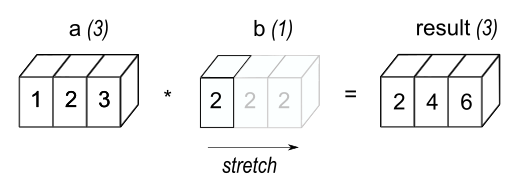

In the simplest example of broadcasting, the scalar b is stretched to become an array of same shape as a so the shapes are compatible for element-by-element multiplication.

The code in the second example is more efficient than that in the first because broadcasting moves less memory around during the multiplication (b is a scalar rather than an array).

## General Broadcasting Rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

1. they are equal, or
2. one of them is 1.

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.

For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

In [ ]:
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

In [ ]:
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

## Broadcastable arrays
A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

For example, if a.shape is (5,1), b.shape is (1,6), c.shape is (6,) and d.shape is () so that d is a scalar, then a, b, c, and d are all broadcastable to dimension (5,6); and

* a acts like a (5,6) array where a[:,0] is broadcast to the other columns,
* b acts like a (5,6) array where b[0,:] is broadcast to the other rows,
* c acts like a (1,6) array and therefore like a (5,6) array where c[:] is broadcast to every row, and finally,
* d acts like a (5,6) array where the single value is repeated.

Here are some more examples:

In [ ]:
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5

Here are examples of shapes that do not broadcast:

In [ ]:
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

An example of broadcasting when a 1-d array is added to a 2-d array:

In [64]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [65]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

As shown in Figure 2, b is added to each row of a. In Figure 3, an exception is raised because of the incompatible shapes.

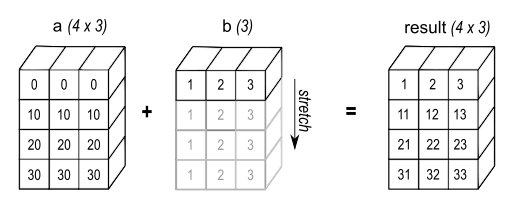

A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns.

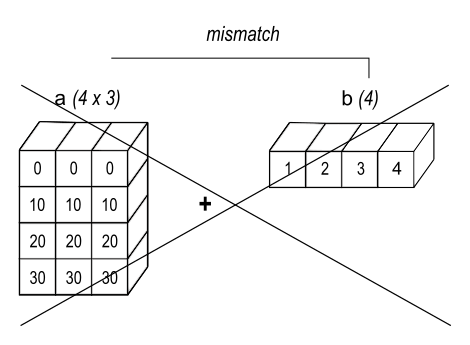

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following example shows an outer addition operation of two 1-d arrays:

In [66]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

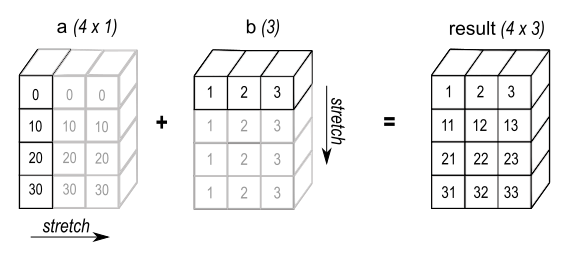

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.

Here the newaxis index operator inserts a new axis into a, making it a two-dimensional 4x1 array. Combining the 4x1 array with b, which has shape (3,), yields a 4x3 array.

## A Practical Example: Vector Quantization
Broadcasting comes up quite often in real world problems. A typical example occurs in the vector quantization (VQ) algorithm used in information theory, classification, and other related areas. The basic operation in VQ finds the closest point in a set of points, called codes in VQ jargon, to a given point, called the observation. In the very simple, two-dimensional case shown below, the values in observation describe the weight and height of an athlete to be classified. The codes represent different classes of athletes. [1] Finding the closest point requires calculating the distance between observation and each of the codes. The shortest distance provides the best match. In this example, codes[0] is the closest class indicating that the athlete is likely a basketball player.

In [ ]:
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])
diff = codes - observation    # the broadcast happens here
dist = sqrt(sum(diff**2,axis=-1))
argmin(dist)

In this example, the observation array is stretched to match the shape of the codes array:

In [ ]:
Observation      (1d array):      2
Codes            (2d array):  4 x 2
Diff             (2d array):  4 x 2

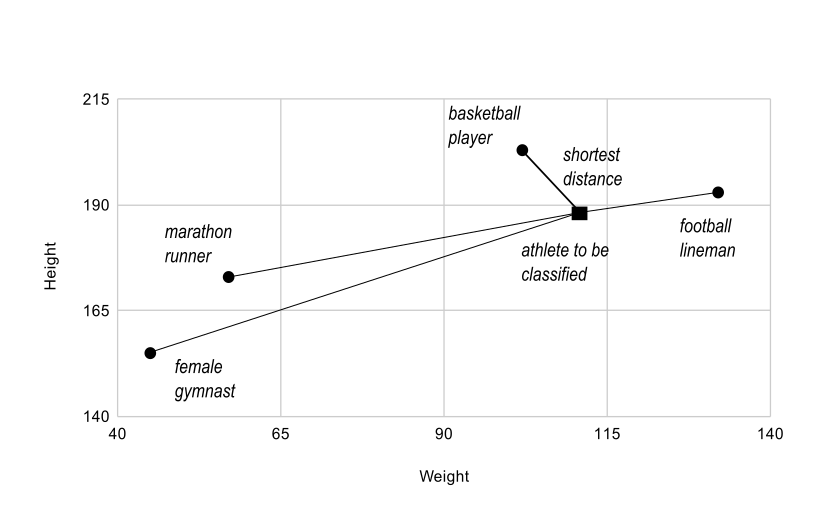

The basic operation of vector quantization calculates the distance between an object to be classified, the dark square, and multiple known codes, the gray circles. In this simple case, the codes represent individual classes. More complex cases use multiple codes per class.

Typically, a large number of observations, perhaps read from a database, are compared to a set of codes. Consider this scenario:


In [ ]:
Observation      (2d array):      10 x 3
Codes            (3d array):   5 x 1 x 3
Diff             (3d array):  5 x 10 x 3

The three-dimensional array, diff, is a consequence of broadcasting, not a necessity for the calculation. Large data sets will generate a large intermediate array that is computationally inefficient. Instead, if each observation is calculated individually using a Python loop around the code in the two-dimensional example above, a much smaller array is used.

Broadcasting is a powerful tool for writing short and usually intuitive code that does its computations very efficiently in C. However, there are cases when broadcasting uses unnecessarily large amounts of memory for a particular algorithm. In these cases, it is better to write the algorithm’s outer loop in Python. This may also produce more readable code, as algorithms that use broadcasting tend to become more difficult to interpret as the number of dimensions in the broadcast increases.

# Advanced indexing and index tricks
NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

## Indexing with Arrays of Indices

In [ ]:
a = np.arange(12)**2  # the first 12 square numbers
i = np.array([1, 1, 3, 8, 5])  # an array of indices
a[i]  # the elements of `a` at the positions `i`

In [ ]:
j = np.array([[3, 4], [9, 7]])  # a bidimensional array of indices
a[j]  # the same shape as `j`

When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [ ]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])
palette[image]  # the (2, 4, 3) color image

We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.

In [ ]:
a = np.arange(12).reshape(3, 4)
a

In [ ]:
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])
j = np.array([[2, 1],  # indices for the second dim
              [3, 3]])
a[i, j]  # i and j must have equal shape

In [ ]:
a[i, 2]

In [ ]:
a[:, j]

In Python, arr[i, j] is exactly the same as arr[(i, j)]—so we can put i and j in a tuple and then do the indexing with that.

In [ ]:
l = (i, j)
# equivalent to a[i, j]
a[l]

However, we can not do this by putting i and j into an array, because this array will be interpreted as indexing the first dimension of a.

In [ ]:
s = np.array([i, j])
# not what we want
a[s]

In [ ]:
# same as `a[i, j]`
a[tuple(s)]

Another common use of indexing with arrays is the search of the maximum value of time-dependent series:

In [ ]:
time = np.linspace(20, 145, 5)  # time scale
data = np.sin(np.arange(20)).reshape(5, 4)  # 4 time-dependent series
time

In [ ]:
data

In [ ]:
# index of the maxima for each series
ind = data.argmax(axis=0)
ind

In [ ]:
# times corresponding to the maxima
time_max = time[ind]
data_max = data[ind, range(data.shape[1])]  # => data[ind[0], 0], data[ind[1], 1]...
time_max

In [ ]:
data_max

In [ ]:
np.all(data_max == data.max(axis=0))

You can also use indexing with arrays as a target to assign to:

In [ ]:
a = np.arange(5)
a

In [ ]:
a[[1, 3, 4]] = 0
a

However, when the list of indices contains repetitions, the assignment is done several times, leaving behind the last value:

In [ ]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
a

This is reasonable enough, but watch out if you want to use Python’s += construct, as it may not do what you expect:

In [ ]:
a = np.arange(5)
a[[0, 0, 2]] += 1
a

Even though 0 occurs twice in the list of indices, the 0th element is only incremented once. This is because Python requires a += 1 to be equivalent to a = a + 1.

## Indexing with Boolean Arrays
When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [ ]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b  # `b` is a boolean with `a`'s shape

In [ ]:
a[b]  # 1d array with the selected elements

This property can be very useful in assignments:

In [ ]:
a[b] = 0  # All elements of `a` higher than 4 become 0
a

You can look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))

The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want:

In [ ]:
a = np.arange(12).reshape(3, 4)
b1 = np.array([False, True, True])         # first dim selection
b2 = np.array([True, False, True, False])  # second dim selection
a[b1, :]                                   # selecting rows

In [ ]:
a[b1]                                      # same thing

In [ ]:
a[:, b2]                                   # selecting columns

In [ ]:
a[b1, b2]                                  # a weird thing to do

Note that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the previous example, b1 has length 3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd axis (columns) of a.

## The ix_() function
The ix_ function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a, b and c:

In [ ]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)
ax

In [ ]:
bx

In [ ]:
cx

In [ ]:
ax.shape, bx.shape, cx.shape

In [ ]:
result = ax + bx * cx
result

In [ ]:
result[3, 2, 4]

In [ ]:
a[3] + b[2] * c[4]

You could also implement the reduce as follows:

In [ ]:
def ufunc_reduce(ufct, *vectors):
   vs = np.ix_(*vectors)
   r = ufct.identity
   for v in vs:
       r = ufct(r, v)
   return r

and then use it as:

In [ ]:
ufunc_reduce(np.add, a, b, c)

The advantage of this version of reduce compared to the normal ufunc.reduce is that it makes use of the broadcasting rules in order to avoid creating an argument array the size of the output times the number of vectors.

# Indexing with strings
See https://numpy.org/doc/stable/user/basics.rec.html#structured-arrays

# Tricks and Tips
Here we give a list of short and useful tips.

## “Automatic” Reshaping
To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:

In [ ]:
a = np.arange(30)
b = a.reshape((2, -1, 3))  # -1 means "whatever is needed"
b.shape

In [ ]:
b

# Vector Stacking
How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if x and y are two vectors of the same length you only need do m=[x;y]. In NumPy this works via the functions column_stack, dstack, hstack and vstack, depending on the dimension in which the stacking is to be done. For example:

In [ ]:
x = np.arange(0, 10, 2)
y = np.arange(5)
m = np.vstack([x, y])
m

In [ ]:
xy = np.hstack([x, y])
xy

The logic behind those functions in more than two dimensions can be strange.

## Histograms
The NumPy histogram function applied to an array returns a pair of vectors: the histogram of the array and a vector of the bin edges. Beware: matplotlib also has a function to build histograms (called hist, as in Matlab) that differs from the one in NumPy. The main difference is that pylab.hist plots the histogram automatically, while numpy.histogram only generates the data.

In [ ]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=True)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5 * (bins[1:] + bins[:-1]), n) 

With Matplotlib >=3.4 you can also use plt.stairs(n, bins).